# Name Genration Model - Using Recurrent Nerual Network (RNN)
## Krupesh Parmar  

This RNN model generates human names, based on exitsting names. This model also contains the implementation of RNN architecture from scratch.   

In [2]:
import numpy as np  
import pandas as pd
import seaborn as sns

## Load Data

In [4]:
name_file = 'dataset.txt'
names = []
with open (name_file, 'r') as file:
    names = file.read().lower()[:-1].split('\n')

print("Number of names: ", len(names))
print("Max length of names: ", max(len(name) for name in names))

Number of names:  1055767
Max length of names:  15


## Preprocessing

Remove the outliers

<Axes: xlabel='len', ylabel='count'>

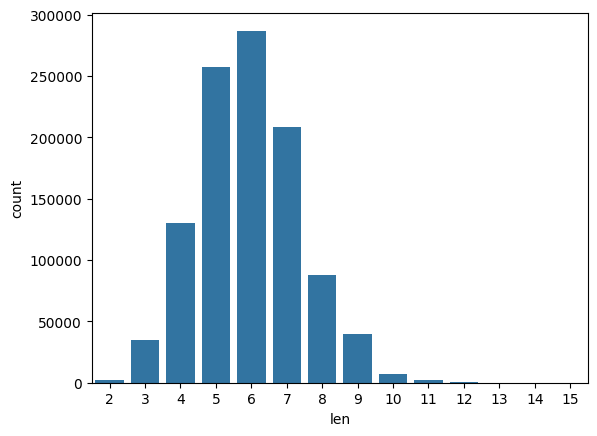

In [18]:
df = pd.DataFrame(names, columns=['name'])
df['len'] = df['name'].apply(len)
count_df = df['len'].value_counts().reset_index().sort_values(by='len')

sns.barplot(x='len', y='count', data=count_df)

As you can see most of the name has length between 3 to 9. So remove words with length < 3 or length > 9.

In [25]:
MIN_LENGTH = 3
MAX_LENGTH = 9

names = [name for name in names if len(name) >= MIN_LENGTH and len(name) <= MAX_LENGTH]
print("Number of names after filtering: ", len(names))

Number of names after filtering:  1044407


For now let's just focus on names that contain only English alphabets. So remove names that contains other characters

In [43]:
valid_chars = 'abcdefghijklmnopqrstuvwxyz-'

for name in names:
    if not set(name).issubset(valid_chars):
        names.remove(name)

In [44]:
print("Number of names after filtering: ", len(names))

Number of names after filtering:  1044313


In [45]:
# make the list of unique characters in the names + start and end characters
# will use later for Dictionary Lookup

START_CHAR = ' '
PADDING_CHAR = '#'


char_set = sorted(set(''.join(names + [START_CHAR] + [PADDING_CHAR])))
print("Number of unique characters: ", len(char_set))
print("Unique characters: ", char_set)

Number of unique characters:  29
Unique characters:  [' ', '#', '-', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


creat dictionaries for char_to_id and id_to_char

In [46]:
char_to_id = {char: idx for idx, char in enumerate(char_set)}
id_to_char = {idx: char for idx, char in enumerate(char_set)}
print("Char to id: ", char_to_id)

Char to id:  {' ': 0, '#': 1, '-': 2, 'a': 3, 'b': 4, 'c': 5, 'd': 6, 'e': 7, 'f': 8, 'g': 9, 'h': 10, 'i': 11, 'j': 12, 'k': 13, 'l': 14, 'm': 15, 'n': 16, 'o': 17, 'p': 18, 'q': 19, 'r': 20, 's': 21, 't': 22, 'u': 23, 'v': 24, 'w': 25, 'x': 26, 'y': 27, 'z': 28}
